In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


In [2]:
rent_df = pd.read_csv("../datasets/House_Rent_Dataset.csv")
rent_df.sample(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2158,2022-04-29,1,9000,500,3 out of 4,Super Area,"Jp Nagar Phase 7, J P Nagar",Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner
2045,2022-07-08,3,60000,1500,3 out of 4,Carpet Area,Indira Nagar,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
920,2022-06-15,1,75000,575,1 out of 9,Carpet Area,Malabar Hill,Mumbai,Semi-Furnished,Family,1,Contact Agent
3132,2022-06-14,3,90000,2300,2 out of 4,Carpet Area,Gopalapuram,Chennai,Semi-Furnished,Bachelors,3,Contact Agent
974,2022-06-27,1,25000,325,17 out of 24,Carpet Area,"Mahalaxmi CHS, Worli",Mumbai,Furnished,Bachelors/Family,1,Contact Agent


In [3]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
rent_df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
rent_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,4746.0,2.083860,0.832256,1.0,2.0,2.0,3.0,6.0
Rent,4746.0,34993.451327,78106.412937,1200.0,10000.0,16000.0,33000.0,3500000.0
Size,4746.0,967.490729,634.202328,10.0,550.0,850.0,1200.0,8000.0
Bathroom,4746.0,1.965866,0.884532,1.0,1.0,2.0,2.0,10.0


In [8]:
rent_df.describe(include='object').T

,count,unique,top,freq
Posted On,4746,81,2022-07-06,311
Floor,4746,480,1 out of 2,379
Area Type,4746,3,Super Area,2446
Area Locality,4746,2235,Bandra West,37
City,4746,6,Mumbai,972
Furnishing Status,4746,3,Semi-Furnished,2251
Tenant Preferred,4746,3,Bachelors/Family,3444
Point of Contact,4746,3,Contact Owner,3216


In [9]:
num_cols = rent_df.select_dtypes(include=["number"]).columns
num_cols

Index(['BHK', 'Rent', 'Size', 'Bathroom'], dtype='object')

In [10]:
cat_cols = rent_df.select_dtypes('object').columns
cat_cols

Index(['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Point of Contact'],
      dtype='object')

In [ ]:
cols_to_drop = ['Rent', 'Posted On', 'Area Locality', 'Floor']

In [ ]:
X = rent_df.drop(cols_to_drop, axis=1)  # Удаляем таргет, и колонки с большим количеством уникальных значений
y = rent_df['Rent']

cat_cols = X.select_dtypes('object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_cols)
    ], remainder='passthrough')

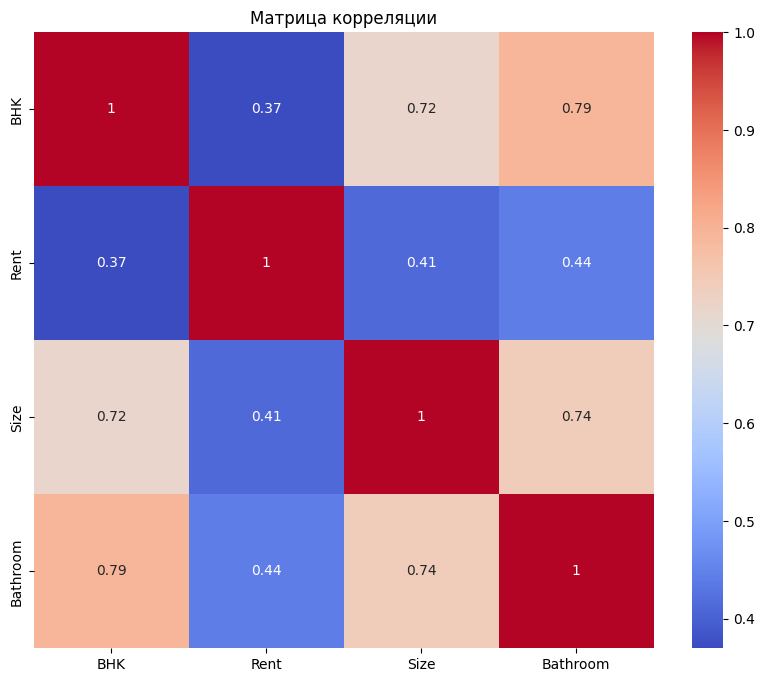

In [9]:
# Матрица корреляции для числовых признаков
num_df = rent_df[num_cols]
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [ ]:


num_df = X
corr_matrix = num_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

ValueError: could not convert string to float: 'Super Area'

In [14]:
X

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lin_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
lin_pipe.fit(X_train, y_train)
y_pred_lin = lin_pipe.predict(X_test)

poly_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('poly', PolynomialFeatures(degree=2)),
                            ('regressor', LinearRegression())])
poly_pipe.fit(X_train, y_train)
y_pred_poly = poly_pipe.predict(X_test)

ridge_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', Ridge(alpha=1.0))])
ridge_pipe.fit(X_train, y_train)
y_pred_ridge = ridge_pipe.predict(X_test)

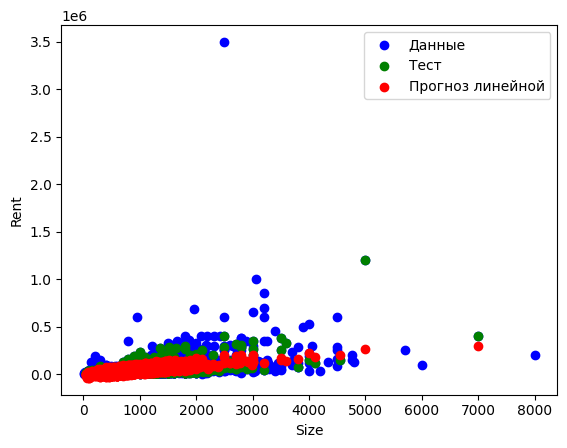

Уравнение: Rent = 50.93 * Size + -14282.44


In [ ]:
plt.scatter(rent_df['Size'], rent_df['Rent'], color='blue', label='Данные')
plt.scatter(X_test['Size'], y_test, color='green', label='Тест')
plt.scatter(X_test['Size'], y_pred_lin, color='red', label='Прогноз линейной')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend()
plt.show()


In [ ]:
lin_coef = lin_pipe.named_steps['regressor'].coef_ 
lin_inter = lin_pipe.named_steps['regressor'].intercept_ 
feat_names = lin_pipe.named_steps['preprocessor'].get_feature_names_out() 

eq = f"Rent = {lin_inter:.3f}" 
for name, c in zip(feat_names, lin_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Weight = -18486.370 + (5553.960 * cat__Area Type_Built Area) + (-1275.123 * cat__Area Type_Carpet Area) + (-4278.837 * cat__Area Type_Super Area) + (-4874.722 * cat__City_Bangalore) + (-12703.227 * cat__City_Chennai) + (2349.352 * cat__City_Delhi) + (-21727.989 * cat__City_Hyderabad) + (-7842.364 * cat__City_Kolkata) + (44798.950 * cat__City_Mumbai) + (5569.976 * cat__Furnishing Status_Furnished) + (-3045.807 * cat__Furnishing Status_Semi-Furnished) + (-2524.169 * cat__Furnishing Status_Unfurnished) + (4079.037 * cat__Tenant Preferred_Bachelors) + (3307.130 * cat__Tenant Preferred_Bachelors/Family) + (-7386.167 * cat__Tenant Preferred_Family) + (-5005.848 * cat__Point of Contact_Contact Agent) + (19397.413 * cat__Point of Contact_Contact Builder) + (-14391.565 * cat__Point of Contact_Contact Owner) + (3669.642 * remainder__BHK) + (36.602 * remainder__Size) + (11502.331 * remainder__Bathroom)


In [18]:
ridge_coef = ridge_pipe.named_steps['regressor'].coef_ 
ridge_inter = ridge_pipe.named_steps['regressor'].intercept_ 
feat_names = ridge_pipe.named_steps['preprocessor'].get_feature_names_out() 

eq = f"Rent = {ridge_inter:.3f}" 
for name, c in zip(feat_names, ridge_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Rent = -23041.907 + (4143.493 * cat__Area Type_Built Area) + (-565.428 * cat__Area Type_Carpet Area) + (-3578.065 * cat__Area Type_Super Area) + (-4864.840 * cat__City_Bangalore) + (-12677.144 * cat__City_Chennai) + (2333.331 * cat__City_Delhi) + (-21665.629 * cat__City_Hyderabad) + (-7821.047 * cat__City_Kolkata) + (44695.329 * cat__City_Mumbai) + (5571.089 * cat__Furnishing Status_Furnished) + (-3051.927 * cat__Furnishing Status_Semi-Furnished) + (-2519.162 * cat__Furnishing Status_Unfurnished) + (4056.488 * cat__Tenant Preferred_Bachelors) + (3306.679 * cat__Tenant Preferred_Bachelors/Family) + (-7363.167 * cat__Tenant Preferred_Family) + (-1075.223 * cat__Point of Contact_Contact Agent) + (11598.438 * cat__Point of Contact_Contact Builder) + (-10523.215 * cat__Point of Contact_Contact Owner) + (3661.371 * remainder__BHK) + (36.579 * remainder__Size) + (11508.325 * remainder__Bathroom)


In [17]:
poly_coef = poly_pipe.named_steps['regressor'].coef_ 
poly_inter = poly_pipe.named_steps['regressor'].intercept_ 
feat_names = poly_pipe.named_steps['poly'].get_feature_names_out() 

eq = f"Rent = {poly_inter:.3f}" 
for name, c in zip(feat_names, poly_coef):
    eq += f" + ({c:.3f} * {name})"
print(eq) 

Rent = -3168.142 + (0.000 * 1) + (-110.334 * x0) + (312.401 * x1) + (-202.066 * x2) + (1984.962 * x3) + (2538.087 * x4) + (-2952.443 * x5) + (1483.160 * x6) + (1009.869 * x7) + (-4063.635 * x8) + (1098.648 * x9) + (-1310.923 * x10) + (212.275 * x11) + (1489.554 * x12) + (917.743 * x13) + (-2407.297 * x14) + (-1361.272 * x15) + (-0.005 * x16) + (1361.278 * x17) + (-3930.159 * x18) + (15.966 * x19) + (-697.609 * x20) + (-110.334 * x0^2) + (-0.000 * x0 x1) + (-0.000 * x0 x2) + (-0.000 * x0 x3) + (110.335 * x0 x4) + (-0.000 * x0 x5) + (-220.669 * x0 x6) + (0.000 * x0 x7) + (0.000 * x0 x8) + (110.335 * x0 x9) + (0.000 * x0 x10) + (-220.669 * x0 x11) + (-0.000 * x0 x12) + (-110.334 * x0 x13) + (0.000 * x0 x14) + (0.000 * x0 x15) + (0.000 * x0 x16) + (-110.334 * x0 x17) + (0.000 * x0 x18) + (0.107 * x0 x19) + (0.000 * x0 x20) + (312.401 * x1^2) + (-0.000 * x1 x2) + (-436.818 * x1 x3) + (-151.093 * x1 x4) + (-2984.574 * x1 x5) + (-2745.901 * x1 x6) + (748.911 * x1 x7) + (5881.877 * x1 x8) + (-

In [5]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name}:')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}\n')

print_metrics(y_test, y_pred_lin, 'Linear Regression')
print_metrics(y_test, y_pred_poly, 'Polynomial Regression')
print_metrics(y_test, y_pred_ridge, 'Ridge Regression')

Linear Regression:
R2: -0.2871
RMSE: 71621.7037
MAE: 24280.5795
MSE: 5129668434.5078

Polynomial Regression:
R2: 0.6004
RMSE: 39908.0475
MAE: 15159.0479
MSE: 1592652256.2411

Ridge Regression:
R2: 0.3078
RMSE: 52523.2266
MAE: 23414.8538
MSE: 2758689332.6782



In [13]:
def print_metrics(y_true, y_pred, model_name):
    print(f'{model_name}:')
    print(f'R2: {r2_score(y_true, y_pred):.4f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}')
    print(f'MAE: {mean_absolute_error(y_true, y_pred):.4f}')
    print(f'MSE: {mean_squared_error(y_true, y_pred):.4f}\n')

print_metrics(y_test, y_pred_lin, 'Linear Regression')
print_metrics(y_test, y_pred_poly, 'Polynomial Regression')
print_metrics(y_test, y_pred_ridge, 'Ridge Regression')

Linear Regression:
R2: 0.5205
RMSE: 43717.0552
MAE: 22232.6300
MSE: 1911180916.2022

Polynomial Regression:
R2: 0.7958
RMSE: 28528.0921
MAE: 14062.6489
MSE: 813852036.6120

Ridge Regression:
R2: 0.5205
RMSE: 43716.6342
MAE: 22222.5073
MSE: 1911144103.7330



In [ ]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted_Linear': y_pred_lin,
    'Predicted_Polynomial': y_pred_poly,
    'Predicted_Ridge': y_pred_ridge
})
results.to_csv('rent_predictions.csv', index=False)
results.head()